# Questions to find from this dataset
---
### a. How many genomes are there for each kingdom? And how many unique species names? (EXAMPLE)
### b. Make a new dataframe with just rows of *Aquila* genus? (EXAMPLE)
### c. In which assembly status are the most insect genomes? And the most amphibian genomes? (EXAMPLE)
### d. Which genomes have at least 10% more proteins than genes? (EXAMPLE)
---
### 1. How many species were added each year? Is there a pattern?
### 2. Which class has the most amount of intergenic DNA?
### 3. Which organisms have genomes roughly the same length as humans? (+ or - 20% only)
### 4. Which kingdom has the most/least amount of completed genomes?
### 5. What is the most common assembly status for each year in the last 10 years (of the years recorded)? 
### 6. What is the pattern of intergenic DNA amongst the kingdoms?
### 7. 
### 8.
### 9.
### 10.
### 11.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

my_types = {
    'Species': 'string',
    'Kingdom': 'string',
    'Class': 'string',
    'Assembly status': 'string',
    'Number of genes': 'Int64',
    'Number of proteins': 'Int64',
}

euk = pd.read_csv('eukaryotes.tsv', sep='\t', na_values=['-'], dtype=my_types)

euk.head()

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5000,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.0470,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200,37660,2010,Chromosome


In [3]:
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   string 
 1   Kingdom             8302 non-null   string 
 2   Class               8302 non-null   string 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 7895 non-null   float64
 5   Number of genes     2372 non-null   Int64  
 6   Number of proteins  2371 non-null   Int64  
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   string 
dtypes: Int64(2), float64(2), int64(1), string(4)
memory usage: 600.1 KB


## a. How many genomes are there for each kingdom? And how many unique species names? (EXAMPLE)

In [4]:
kingdom_count = euk['Kingdom'].value_counts()
print(f'The number of species in each kingdom is \n{kingdom_count}\n')

for kingdom in euk['Kingdom'].unique():
    unique_count = len(euk[euk['Kingdom'] == kingdom]['Species'].unique())
    print(f'The {kingdom} kingdom has {unique_count} unique species.')

# ADD IN BARPLOT? TO SHOW NUMBERS OF EACH CATEGORY

The number of species in each kingdom is 
Fungi       4494
Animals     2181
Plants       870
Protists     727
Other         30
Name: Kingdom, dtype: Int64

The Protists kingdom has 449 unique species.
The Plants kingdom has 464 unique species.
The Fungi kingdom has 2554 unique species.
The Animals kingdom has 1442 unique species.
The Other kingdom has 27 unique species.


## b. Make a new dataframe with just rows of Aquila genus? (EXAMPLE)

In [5]:
euk['Genus'] = euk['Species'].str.split(' ').str[0]

aquila_df = euk[euk['Genus'] == 'Aquila']
aquila_df

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Genus
1755,Aquila chrysaetos canadensis,Animals,Birds,1192.74,41.9001,17520,31284,2014,Scaffold,Aquila
4388,Aquila chrysaetos canadensis,Animals,Birds,1548.48,43.5000,<NA>,<NA>,2014,Scaffold,Aquila
5342,Aquila chrysaetos chrysaetos,Animals,Birds,1228.51,42.2000,<NA>,<NA>,2018,Scaffold,Aquila


## c. In which assembly status are the most insect genomes? And the most amphibian genomes? (EXAMPLE)

In [6]:
insects = euk[euk['Class'] == 'Insects']
a_status_insects = insects['Assembly status'].value_counts()

amphib = euk[euk['Class'] == 'Amphibians']
a_status_amphib = amphib['Assembly status'].value_counts()


print(f'The insects are in the following assembly statuses: \n{a_status_insects}\n')
print(f'The amphibians are in the following assembly statuses: \n{a_status_amphib}')


The insects are in the following assembly statuses: 
Scaffold      497
Contig         55
Chromosome     50
Name: Assembly status, dtype: Int64

The amphibians are in the following assembly statuses: 
Scaffold      3
Chromosome    3
Contig        1
Name: Assembly status, dtype: Int64


## d. Which genomes have at least 10% more proteins than genes? (EXAMPLE)

In [7]:
euk[euk['Number of proteins'] >= (euk['Number of genes']*1.1)]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Genus
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome,Glycine
3,Medicago truncatula,Plants,Land Plants,412.924000,34.0470,37603,41939,2011,Chromosome,Medicago
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome,Solanum
6,Oryza sativa Japonica Group,Plants,Land Plants,374.423000,43.5769,35219,42580,2015,Chromosome,Oryza
...,...,...,...,...,...,...,...,...,...,...
6487,Fusarium oxysporum f. sp. melonis 26406,Fungi,Ascomycetes,54.034300,47.5000,20030,26719,2012,Scaffold,Fusarium
6523,Fusarium oxysporum Fo47,Fungi,Ascomycetes,49.664600,47.7000,18553,24818,2012,Scaffold,Fusarium
6626,Arabidopsis thaliana,Plants,Land Plants,93.654500,36.0433,16842,20111,2000,Chromosome,Arabidopsis
6781,Mus musculus,Animals,Mammals,3251.250000,41.8306,31682,45437,2005,Chromosome,Mus


## 1. How many species were added each year? Is there a pattern?

Top five years of number of species added to the database: 
2018    2389
2016    1229
2017    1207
2015     890
2019     670
Name: Publication year, dtype: int64


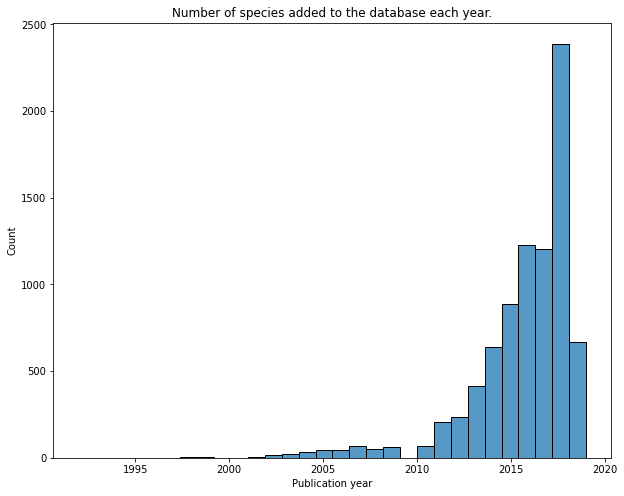

In [8]:
yearly_pubs = euk['Publication year'].dropna()

plt.figure(figsize=(10,8))
sns.histplot(yearly_pubs, bins=30)
plt.title('Number of species added to the database each year.')

print(f'Top five years of number of species added to the database: \n{yearly_pubs.value_counts()[:5]}')


## 2. Which class has the most amount of intergenic DNA?

Text(0.5, 1.0, 'Relationship between \nGenome length vs Gene-to-length percentage')

<Figure size 720x576 with 0 Axes>

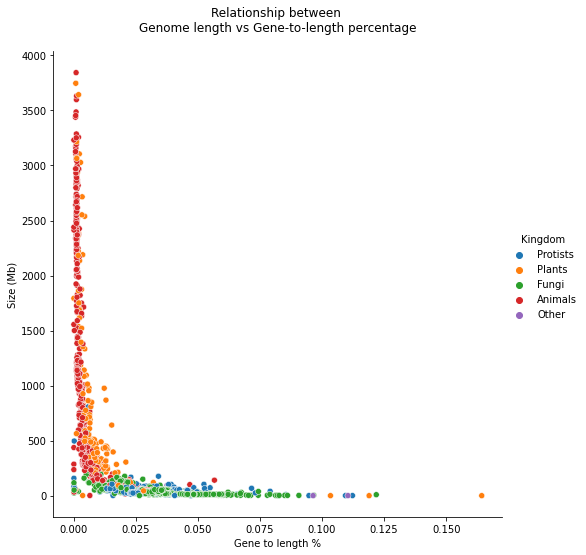

In [9]:
euk['Size'] = (euk['Size (Mb)'])*1000000
euk['Size'] = euk['Size'].astype('int64')
euk['Gene to length %'] = (euk['Number of genes'])/(euk['Size'])*100

euk['Size'].describe()

plt.figure(figsize=(10,8))

sns.relplot(data=euk[euk['Size'] < 4*10**9], x='Gene to length %', y='Size (Mb)', hue='Kingdom', height=7)
plt.title('Relationship between \nGenome length vs Gene-to-length percentage', pad=20)

## 3. Which organisms have genomes roughly the same length as humans? (+ or - 20% only)

In [10]:
humans = euk[euk['Species'] == 'Homo sapiens']
mean_human_genome_length = round(euk['Size'].mean())
print(f'The mean human genome length is: {mean_human_genome_length} bases long.')

close_to_human = euk[(euk['Size'] <= mean_human_genome_length*1.2) & (euk['Size'] >= mean_human_genome_length*0.8)]

close_to_human

approx_human_list = close_to_human['Genus'].unique()

print(f'There are {len(approx_human_list)} different genus with genomes within 20% of the human genome.\n')
print(f'The unique genus names are: \n{approx_human_list}')

# sns.relplot(data=close_to_human, x=)


The mean human genome length is: 401918437 bases long.
There are 189 different genus with genomes within 20% of the human genome.

The unique genus names are: 
['Medicago' 'Oryza' 'Glossina' 'Takifugu' 'Bombyx' 'Lotus' 'Populus'
 'Gasterosteus' 'Tetraodon' 'Nematostella' 'Schistosoma' 'Ancylostoma'
 'Physcomitrella' 'Lolium' 'Erythranthe' 'Carica' 'Theobroma' 'Ricinus'
 'Vigna' 'Oesophagostomum' 'Melitaea' 'Daucus' 'Varroa' 'Acropora'
 'Anopheles' 'Ceratitis' 'Myzus' 'Solenopsis' 'Harpegnathos' 'Percopsis'
 'Lota' 'Merlangius' 'Acanthaster' 'Trachyrincus' 'Aurelia' 'Boreogadus'
 'Arctogadus' 'Trifolium' 'Pollachius' 'Merluccius' 'Cucumis' 'Citrus'
 'Dunaliella' 'Bactrocera' 'Gadus' 'Heliothis' 'Phaseolus' 'Bicyclus'
 'Musa' 'Setaria' 'Brassica' 'Phlebotomus' 'Nippostrongylus' 'Plutella'
 'Betula' 'Persea' 'Cynoglossus' 'Zeugodacus' 'Manduca' 'Stylophora'
 'Vaccinium' 'Branchiostoma' 'Pomacea' 'Lucilia' 'Helicoverpa'
 'Heliconius' 'Erigeron' 'Agrilus' 'Fagus' 'Macleaya' 'Raphanus'
 'Ane

## 4. Which kingdom has the most/least amount of completed genomes?

In [11]:
kingdoms = euk['Kingdom'].unique()

for king in kingdoms:
    filtered = euk[euk['Kingdom'] == king]
    complete_count = len(filtered[filtered['Assembly status'] == 'Complete Genome'])
    print(f'The {king} kingdom has the following assembly statuses: {complete_count}\n')

The Protists kingdom has the following assembly statuses: 7

The Plants kingdom has the following assembly statuses: 2

The Fungi kingdom has the following assembly statuses: 50

The Animals kingdom has the following assembly statuses: 1

The Other kingdom has the following assembly statuses: 1



## 5. What is the most common assembly status for each year in the last 5 years (of the years recorded)?

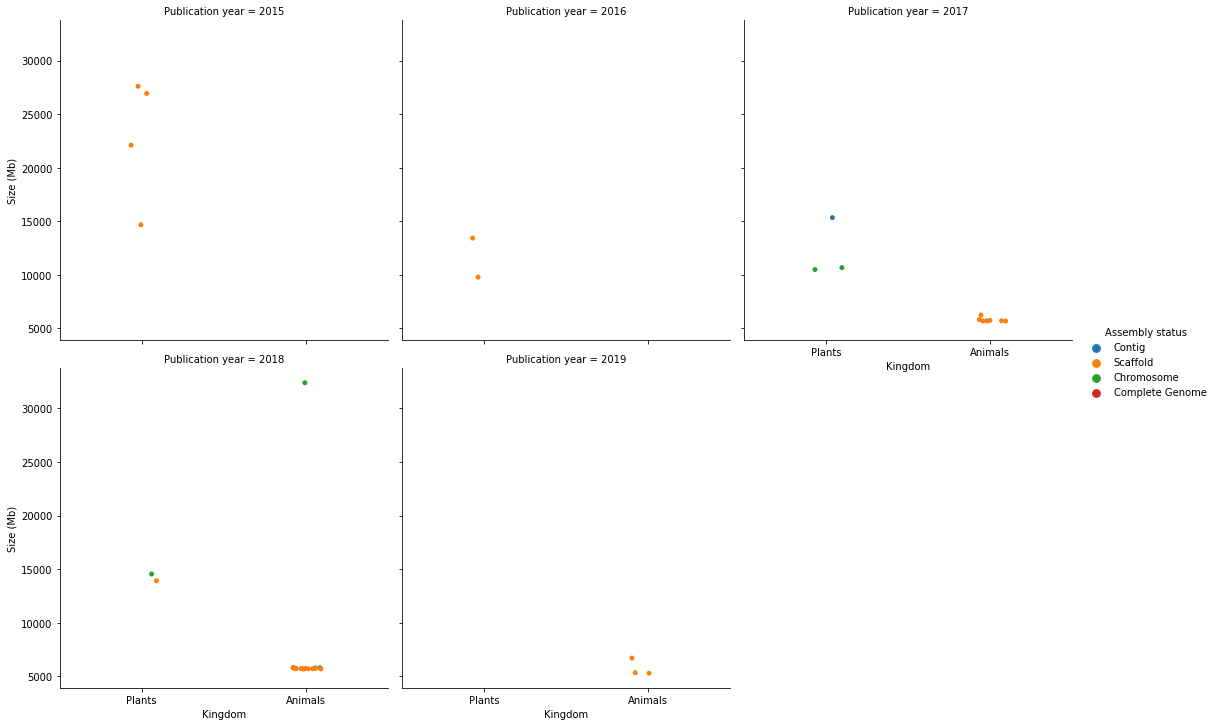

In [19]:
latest_year = euk['Publication year'].max()
earliest_year = latest_year - 4

prev_5 = euk[(euk['Publication year'] >= earliest_year) & (euk['Publication year'] <= latest_year)]

years = sorted(prev_5['Publication year'].unique().tolist())

prev_5

sns.catplot(
            data = prev_5[prev_5['Size (Mb)'] < 5000],
            x = 'Kingdom',
            y = 'Size (Mb)',
            hue = 'Assembly status',
            hue_order = ['Contig', 'Scaffold', 'Chromosome', 'Complete Genome'],
            col = 'Publication year',
            col_wrap = 3,
)

# status_dict = {}
# status_list = prev_5['Assembly status'].unique()
# for year in years:
#     status_dict[year] = 0


# for year in years:
#     sep_year = prev_5[prev_5['Publication year'] == year]
#     max_status_level = 0
#     max_status = ''
#     for status in status_list:
#         common_count = len(sep_year[sep_year['Assembly status'] == status])
#         if common_count > max_status_level:
#             max_status_level = common_count
#             max_status = status
#     status_dict[year] = (status, max_status_level)

# status_dict

# Not correct!! Figure this out!!